In [1]:
import scanpy as sc

In [2]:
## Read in unperturbed and perturbed UCE embeddings

In [3]:
adata = sc.read_h5ad('./embryonic_stem_cells_perturb_POU5F1_5_uce_adata.h5ad')

/dfs/user/yhr/uce/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
adata_uce = sc.AnnData(adata.obsm['X_uce'])

In [5]:
adata_uce.obs = adata.obs

         Falling back to preprocessing with `sc.pp.pca` and default params.


/dfs/user/yhr/uce/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


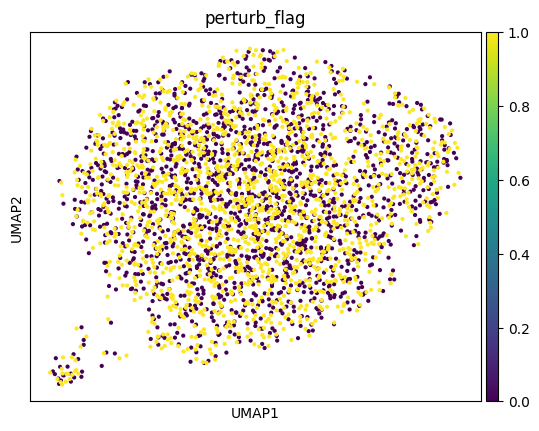

In [6]:
sc.pp.neighbors(adata_uce)
sc.tl.umap(adata_uce)
adata.obs['perturb_flag'] = adata.obs['perturb_flag'].astype('str')
sc.pl.umap(adata_uce, color='perturb_flag')

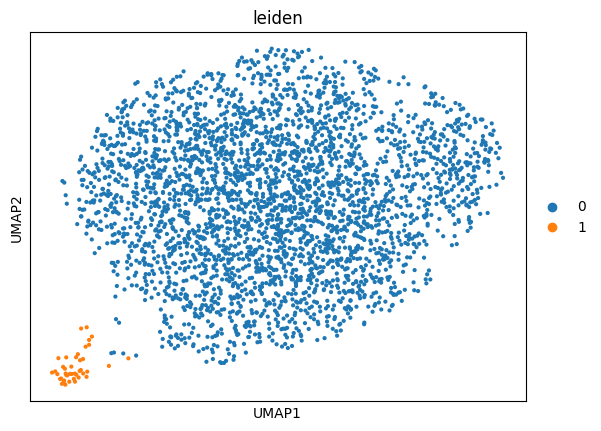

In [18]:
sc.tl.leiden(adata_uce, resolution=0.1)
sc.pl.umap(adata_uce, color='leiden')

In [19]:
## Removing outlier cluster for homogenitiy
adata_uce = adata_uce[adata_uce.obs['leiden'] == '0']

In [21]:
import numpy as np
np.max(adata_uce.X[0] - adata_uce.X[1])

0.01435204

In [22]:
for i in range(0, len(adata_uce),2):
    print(np.max(adata_uce.X[i] - adata_uce.X[i+1]))    

0.01435204
0.014796312
0.01266956
0.01447951
0.009553209
0.016182624
0.013839625
0.014324788
0.012552793
0.0040029716
0.004040573
0.006022848
0.0042589004
0.004502885
0.0045207366
0.006219522
0.0043139085
0.0069177626
0.00464001
0.005504102
0.004499606
0.0062422417
0.0045795143
0.0071463734
0.0040954757
0.0040277326
0.00547057
0.0046567647
0.004978394
0.003596725
0.006545117
0.0041302806
0.004927784
0.0039583873
0.0045584366
0.0057375766
0.004461846
0.0035605244
0.0029077008
0.0040718075
0.004508976
0.0039651804
0.003810456
0.0045321463
0.006340118
0.0056345575
0.005933013
0.0037226528
0.005741935
0.0043001873
0.007103037
0.004460318
0.005943306
0.0044517964
0.004112311
0.0057767536
0.0038034222
0.0022129402
0.004547147
0.0042943265
0.0056594517
0.005168885
0.00443252
0.0038378723
0.00383028
0.0052031176
0.004941933
0.0039234655
0.004475181
0.0051434636
0.0040760785
0.0037755633
0.0044229925
0.0064987103
0.0044454783
0.0038443562
0.0056903884
0.0064259805
0.0040018577
0.0046035815
0.00

0.0061077904
0.004424531
0.005500964
0.0074928273
0.0051728524
0.0058797803
0.008054532
0.0043793973
0.0069077276
0.005639245
0.004930443
0.004638114
0.0051956996
0.0057957917
0.0068359934
0.006262645
0.0054343864
0.005291842
0.0062114885
0.007360261
0.0047490597
0.0060333656
0.0048804153
0.005212456
0.0068356358
0.0063701496
0.0042060874
0.0055578174
0.0051965714
0.0054495772
0.006343825
0.006318559
0.0063854894
0.0067490675
0.006000098
0.0070066713
0.007085629
0.0069380444
0.0051831
0.0079085305
0.0059738043
0.005276772
0.0074745324
0.0072158203
0.006735769
0.0054426687
0.005835407
0.0075434074
0.005463928
0.008673409
0.0051701125
0.0042371918
0.004815944
0.0061669424
0.0077293436
0.0058811605
0.003989819
0.0067091295
0.007876194
0.006168667
0.0051283315
0.0041749813
0.004956886
0.005273698
0.006761141
0.006290026
0.0060249604
0.007219473
0.0060057268
0.005746834
0.0070189657
0.005929916
0.007162108
0.0058479123
0.005694125
0.0053718966
0.0062815957
0.004978299
0.0069615645
0.0065166

0.0066691386
0.0056005935
0.0070873573
0.005722044
0.0063942475
0.0062117837
0.006954998
0.0058034677
0.0065763947
0.008686722
0.0057623833
0.007065785
0.0065099634
0.0074120164
0.0065535996
0.007794044
0.00560331
0.0040661767
0.0071630906
0.006273046
0.008223723
0.006084837
0.0054424843
0.007658285
0.0060318215
0.007421814
0.007067308
0.006307684
0.00631222
0.0065445676
0.006351795
0.006796196
0.007500101
0.005323861
0.006426614
0.005732949
0.00613603
0.006807197
0.004925005
0.005287902
0.0059922077
0.0073394794
0.0047537927
0.0047364943
0.006336633
0.0059757773
0.006237052
0.005822785
0.006295953
0.008636183
0.0060229395
0.0056561893
0.0061557237
0.0059061497
0.0052823145
0.005271298
0.005986955
0.006855832
0.0069768326
0.008041552
0.0072443546
0.005665689
0.005201541
0.005444158
0.009474676
0.00669156
0.0066568516
0.005506806
0.0071299067
0.0053776708
0.005984135
0.008488968
0.0057614194
0.006769132
0.0051508024
0.0048272554
0.006261155
0.0045108506
0.006648102
0.00827654
0.00560666

### Compute change in expression probabilities

In [24]:
import sys
sys.path.append('./gene_probs/')

In [25]:
from gene_probs.probs import UCEGenePredictor

In [57]:
oct4_target_genes = [
    "SOX2", "NANOG", "KLF4", "LIN28A", "ZFP42", "ESRRB",  # Stemness and Pluripotency Genes
    "FGF4", "LEFTY1", "LEFTY2", "UTF1", "TERT",  # Self-Renewal and Survival Genes
    "GDF3", "CDX2", "TBXT",  # Differentiation Inhibition Genes
    "DNMT3B", "SMARCAD1", "SETDB1",  # Epigenetic Modifiers and Chromatin Regulators
    "FOXA2", "EOMES", "HAND1",  # Developmental Pathway Genes
    "MYC", "CCND1",  # Metabolism and Cell Cycle Regulation Genes
    "BMP4", "WNT3A", "NODAL",  # Signaling Pathway Regulators
    "BCL2", "TP53"  # Apoptosis and Stress Response Genes
]


In [58]:
gene_predictor = UCEGenePredictor(device='cuda:0')
cell_embeds = adata.obsm['X_uce']
gene_logprobs = gene_predictor.compute_gene_prob_group(cell_embeds, oct4_target_genes)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3288/3288 [00:16<00:00, 196.27it/s]


In [65]:
gene_logprobs = np.array(gene_logprobs).squeeze()

In [74]:
adata.obsm['gene_logprobs'] = gene_logprobs

unperturbed = adata[adata.obs['perturb_flag']==0]
perturbed = adata[adata.obs['perturb_flag']==1]

In [ ]:
plt.boxplot

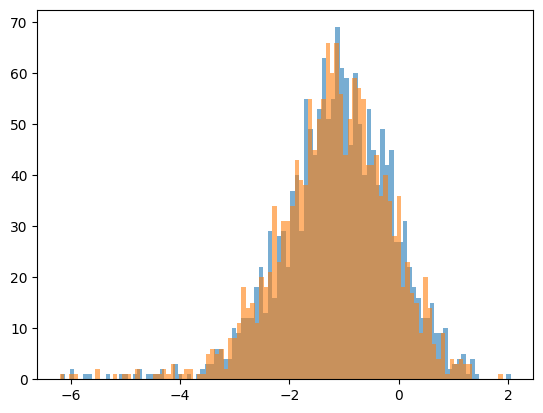

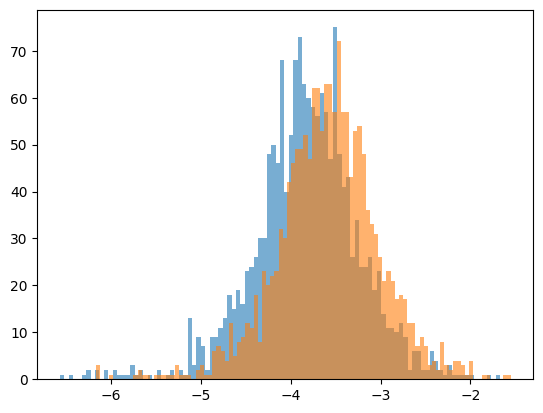

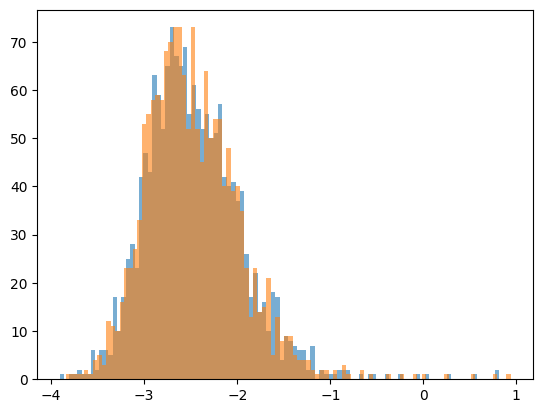

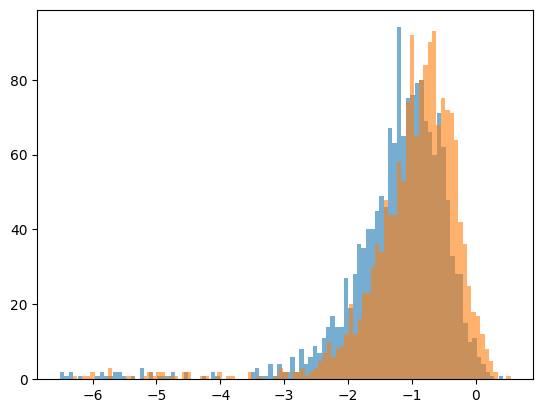

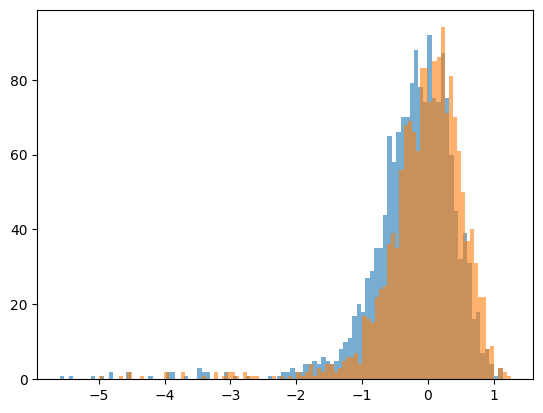

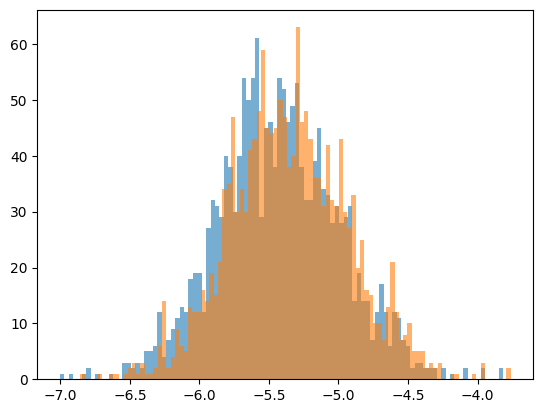

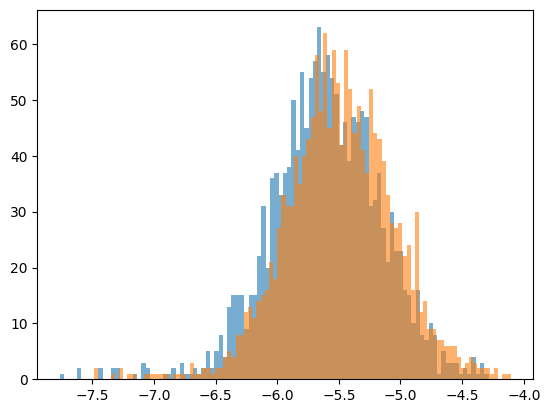

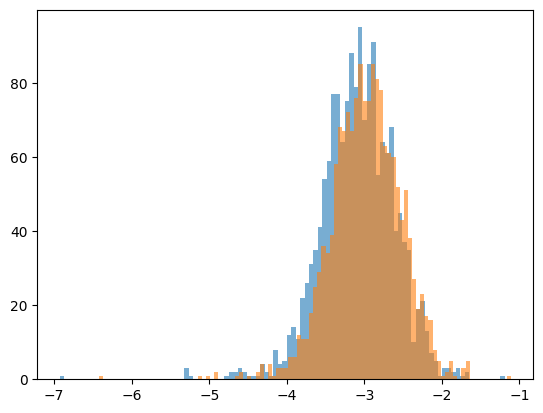

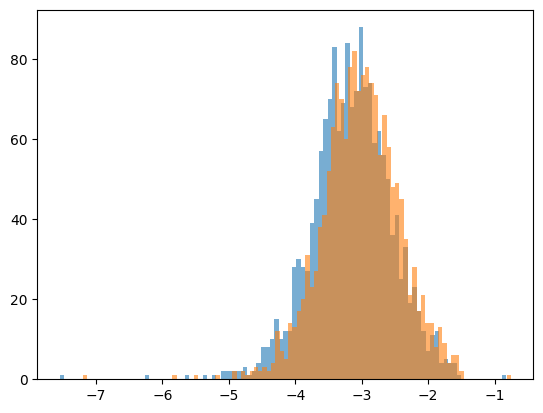

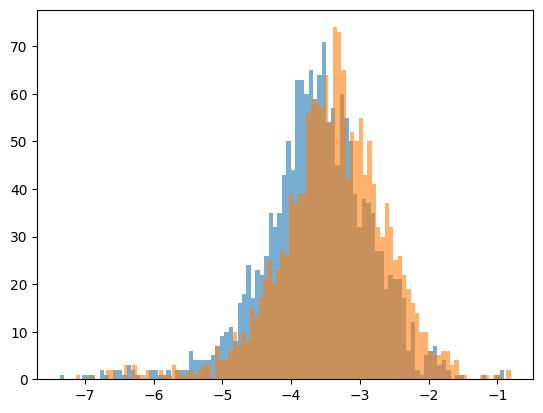

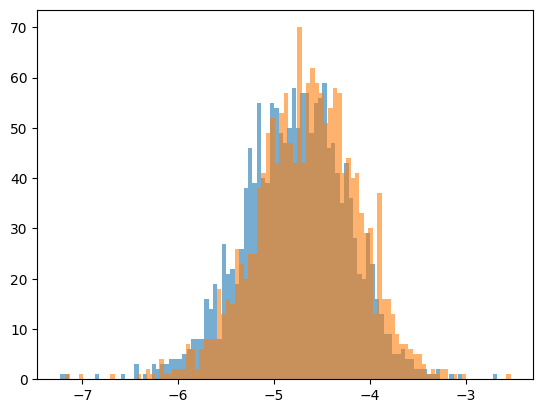

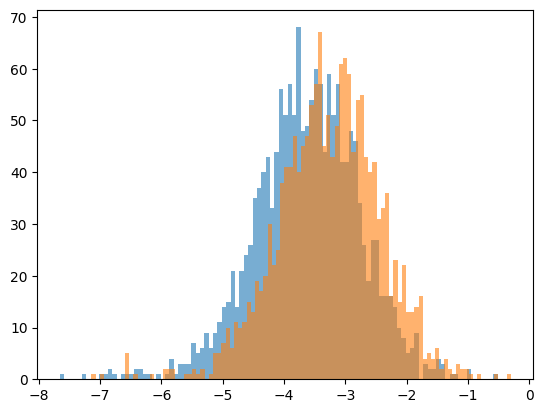

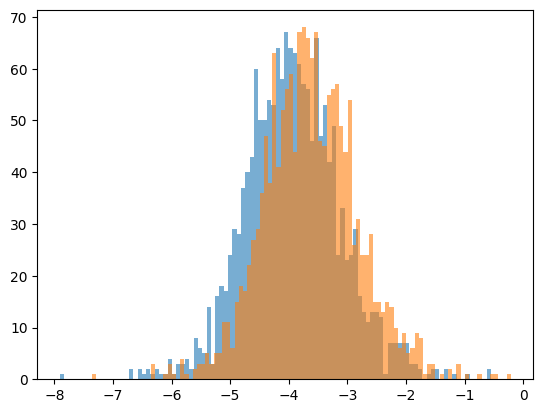

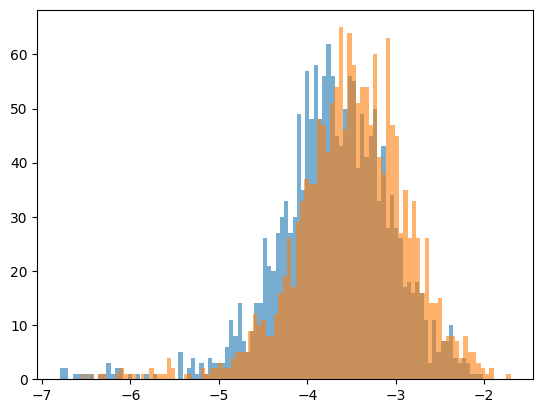

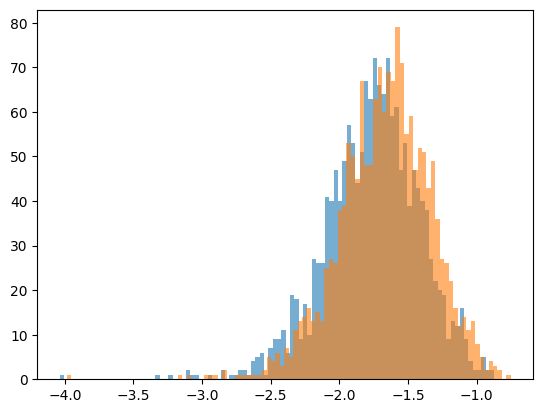

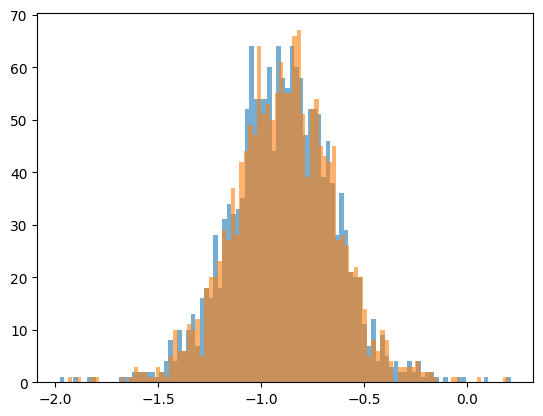

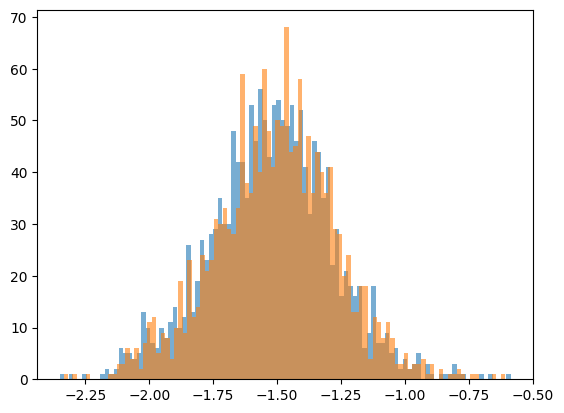

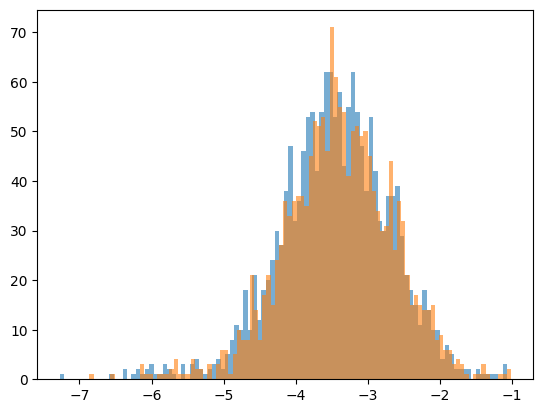

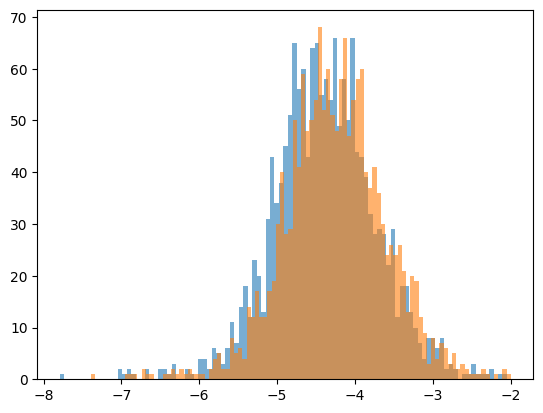

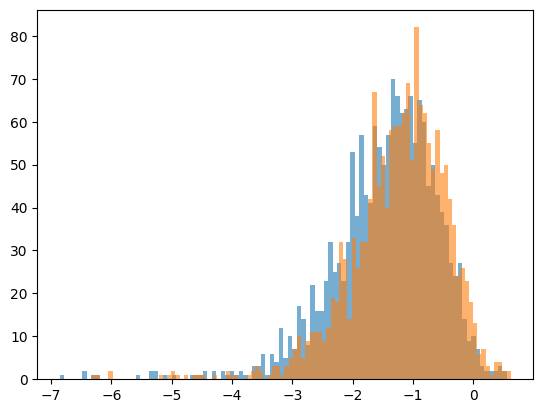

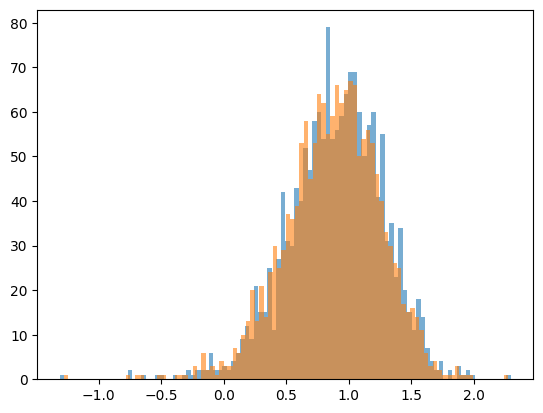

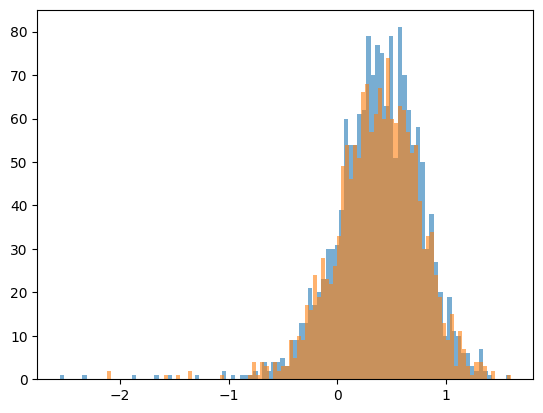

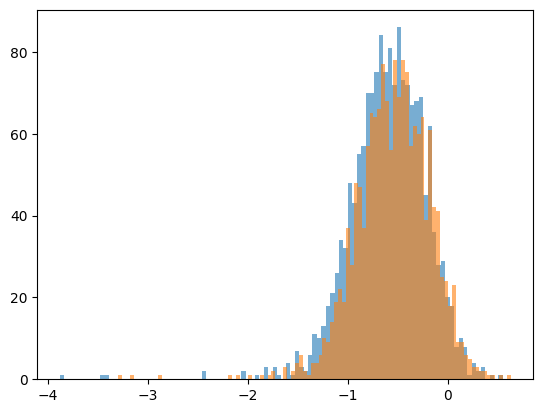

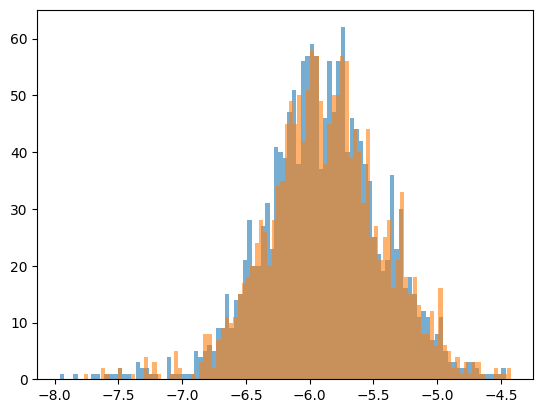

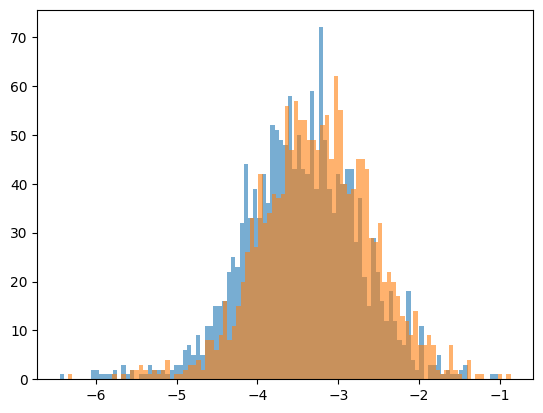

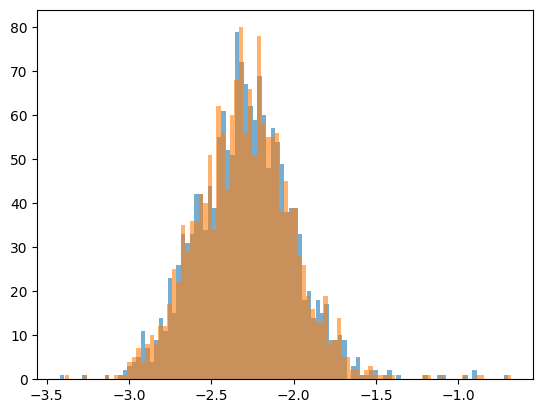

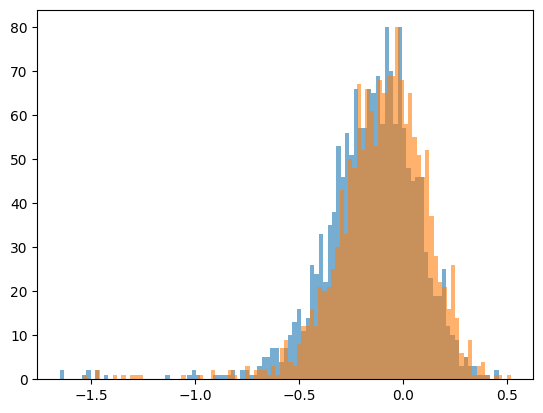

In [83]:
import matplotlib.pyplot as plt

for i in range(len(oct4_target_genes)):
    plt.figure()
    plt.hist(unperturbed.obsm['gene_logprobs'][:, i], bins=100, alpha=0.6)
    _ = plt.hist(perturbed.obsm['gene_logprobs'][:, i], bins=100, alpha=0.6)
    plt.show()

In [117]:
adata.obsm['gene_logprobs_null'] = np.array(gene_logprobs).squeeze()

unperturbed = adata[adata.obs['perturb_flag']==0]
perturbed = adata[adata.obs['perturb_flag']==1]

### Compare to null distribution

In [151]:
np.random.seed(100)
random_list = np.random.choice(adata.var.index.tolist(), 1000)

In [152]:
gene_predictor = UCEGenePredictor(device='cuda:0')
gene_logprobs = gene_predictor.compute_gene_prob_group(cell_embeds, oct4_target_genes)

gene_predictor = UCEGenePredictor(device='cuda:0')
random_gene_logprobs = gene_predictor.compute_gene_prob_group(cell_embeds, random_list)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3288/3288 [00:24<00:00, 132.47it/s]


In [153]:
adata.obsm['target_probs'] = np.array(gene_logprobs).squeeze()
adata.obsm['non_target_probs'] = np.array(random_gene_logprobs).squeeze()

In [154]:
unperturbed = adata[adata.obs['perturb_flag']==0]
perturbed = adata[adata.obs['perturb_flag']==1]

In [125]:
unperturbed.obsm['target_probs'].shape

(1644, 27)

In [126]:
perturbed.obsm['target_probs'].shape

(1644, 27)

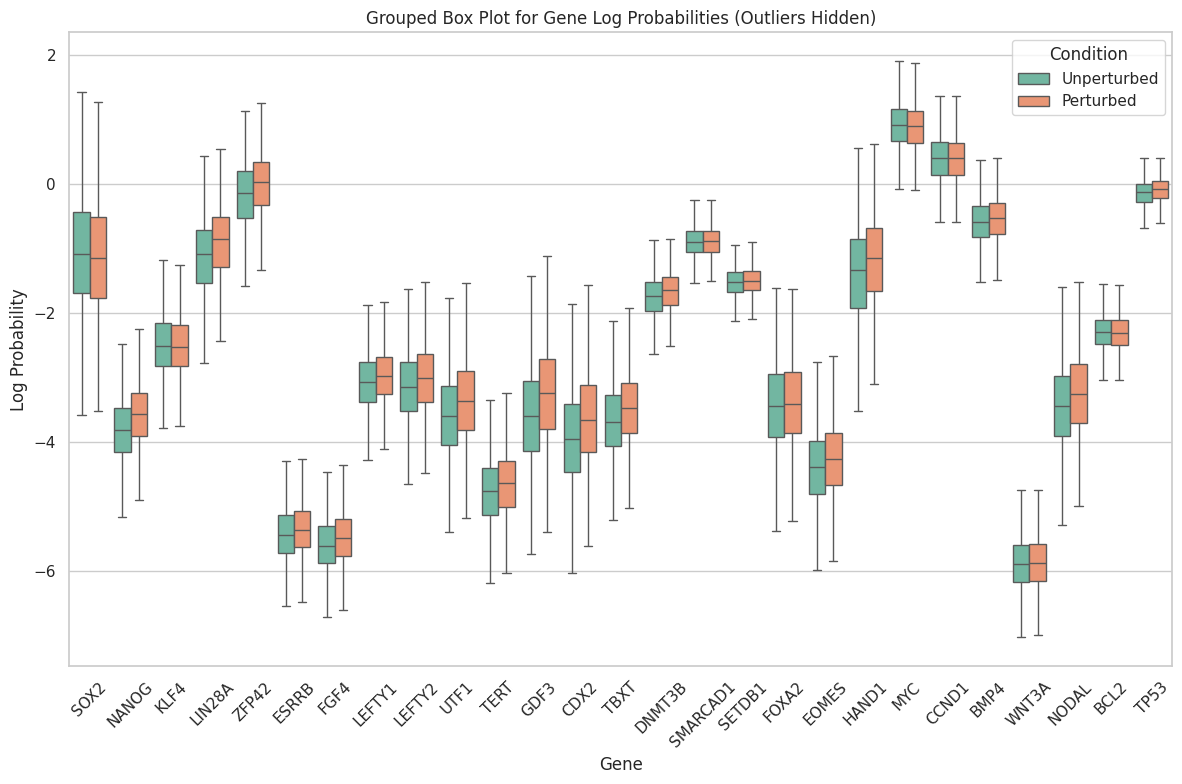

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind

# Prepare the data for seaborn's boxplot
data = []
p_values = []  # To store p-values for each gene

for i in range(len(oct4_target_genes)):
    gene_name = oct4_target_genes[i]
    unperturbed_data = unperturbed.obsm['target_probs'][:, i]
    perturbed_data = perturbed.obsm['target_probs'][:, i]

    # Create a DataFrame for each gene's unperturbed and perturbed data
    data.append(pd.DataFrame({
        'Log Probability': unperturbed_data,
        'Condition': 'Unperturbed',
        'Gene': gene_name
    }))
    data.append(pd.DataFrame({
        'Log Probability': perturbed_data,
        'Condition': 'Perturbed',
        'Gene': gene_name
    }))
    
    # Perform a one-tailed t-test (alternative='greater') for increased expression
    t_stat, p_value = ttest_ind(perturbed_data, unperturbed_data, alternative='greater')
    p_values.append({'Gene': gene_name, 'P-Value': p_value})

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(data, ignore_index=True)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the grouped box plot without outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gene', y='Log Probability', hue='Condition', data=df, palette='Set2', showfliers=False)

# Customize the plot
plt.title('Grouped Box Plot for Gene Log Probabilities (Outliers Hidden)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

# Create a DataFrame for p-values and display it
p_values_df = pd.DataFrame(p_values)

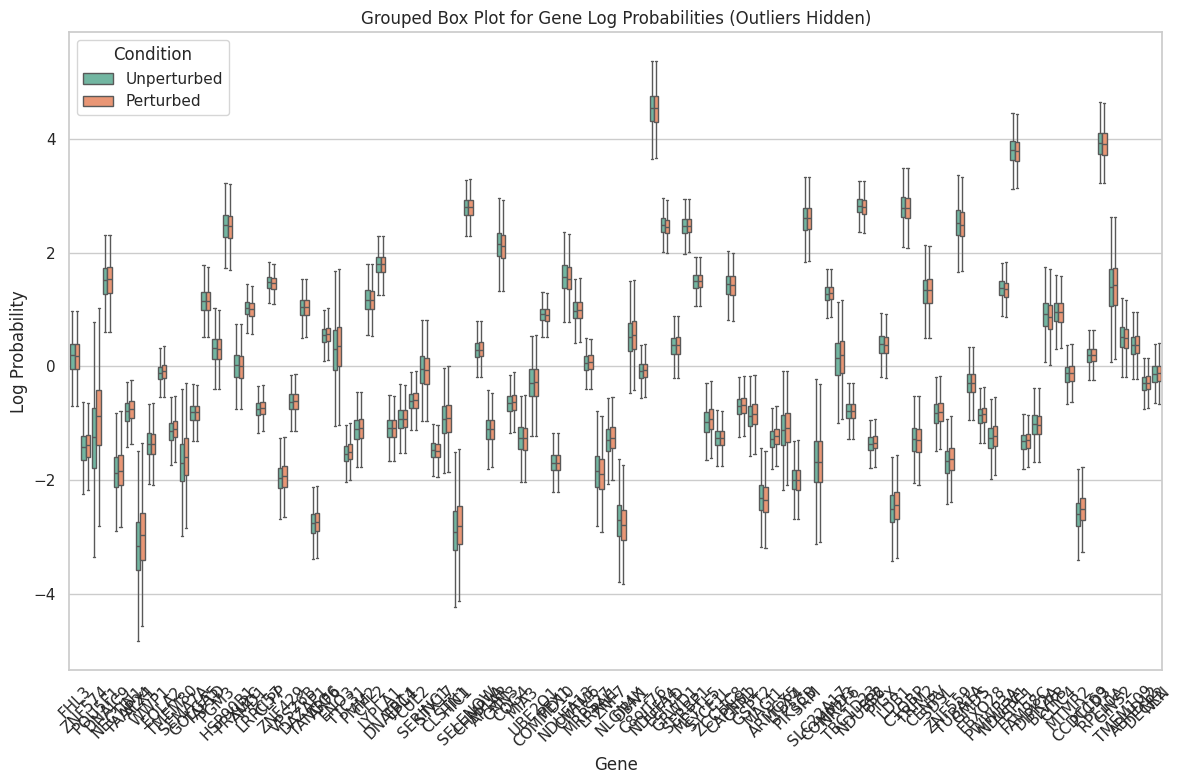

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind

# Prepare the data for seaborn's boxplot
data = []
p_values = []  # To store p-values for each gene

for i in range(len(random_list)):
    gene_name = random_list[i]
    unperturbed_data = unperturbed.obsm['non_target_probs'][:, i]
    perturbed_data = perturbed.obsm['non_target_probs'][:, i]

    # Create a DataFrame for each gene's unperturbed and perturbed data
    data.append(pd.DataFrame({
        'Log Probability': unperturbed_data,
        'Condition': 'Unperturbed',
        'Gene': gene_name
    }))
    data.append(pd.DataFrame({
        'Log Probability': perturbed_data,
        'Condition': 'Perturbed',
        'Gene': gene_name
    }))
    
    # Perform a one-tailed t-test (alternative='greater') for increased expression
    t_stat, p_value = ttest_ind(perturbed_data, unperturbed_data, alternative='greater')
    p_values.append({'Gene': gene_name, 'P-Value': p_value})

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(data, ignore_index=True)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the grouped box plot without outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gene', y='Log Probability', hue='Condition', data=df, palette='Set2', showfliers=False)

# Customize the plot
plt.title('Grouped Box Plot for Gene Log Probabilities (Outliers Hidden)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

# Create a DataFrame for p-values and display it
p_values_df = pd.DataFrame(p_values)

In [155]:
non_target_diffs = []

for i in range(len(random_list)):
    non_target_diffs.append(np.mean(perturbed.obsm['non_target_probs'][:, i] - unperturbed.obsm['non_target_probs'][:, i]))    

    
    
target_diffs = []
for i in range(len(oct4_target_genes)):
    target_diffs.append(np.mean(perturbed.obsm['target_probs'][:, i] - unperturbed.obsm['target_probs'][:, i]))

In [156]:
sns.set(style="white")

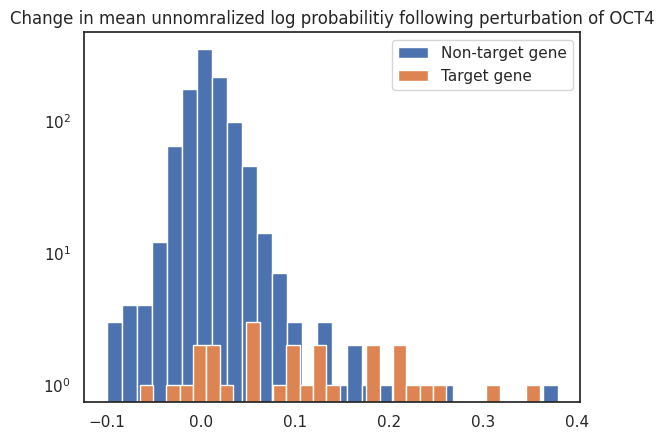

In [158]:
plt.hist(non_target_diffs, bins=30)
_ = plt.hist(target_diffs, bins=30)

plt.legend(['Non-target gene', 'Target gene'])
plt.title('Change in mean unnomralized log probabilitiy following perturbation of OCT4')

plt.yscale('log')